<a href="https://colab.research.google.com/github/aarsh121/Financial-Analysis-using-Python/blob/main/Portfolio_Optimiztion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portfolio Optimization using Efficient Frontier

In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [15]:
#Get the tickers for FANNG companies

assets=['META', 'AMZN', 'AAPL', 'NFLX','GOOG']

In [5]:
#Assign weights to the stock
weights=np.array([0.2,0.2,0.2,0.2,0.2])

In [6]:
#Set the stocks/portfolios starting date
stock_start='2013-01-01'

In [7]:
#Set end date
end_date=datetime.today().strftime('%Y-%m-%d')
end_date

'2024-08-17'

In [23]:
#create a dataframe to store the adjusted close price of the stocks
df=pd.DataFrame()

#store the close price of the stocks in the DF
for stock in assets:
  df[stock]=yf.download(stock, start=stock_start, end=end_date)['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [24]:
df

,META,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,27.942581,12.865500,16.705702,13.144286,17.993254
2013-01-03,27.713053,12.924000,16.494835,13.798571,18.003704
2013-01-04,28.701021,12.957500,16.035381,13.711429,18.359463
2013-01-07,29.359669,13.423000,15.941049,14.171429,18.279356
2013-01-08,29.000406,13.319000,15.983960,13.880000,18.243282
...,...,...,...,...,...
2024-08-12,515.950012,166.800003,217.529999,633.140015,163.949997
2024-08-13,528.539978,170.229996,221.270004,648.020020,165.929993
2024-08-14,526.760010,170.100006,221.720001,661.679993,162.029999


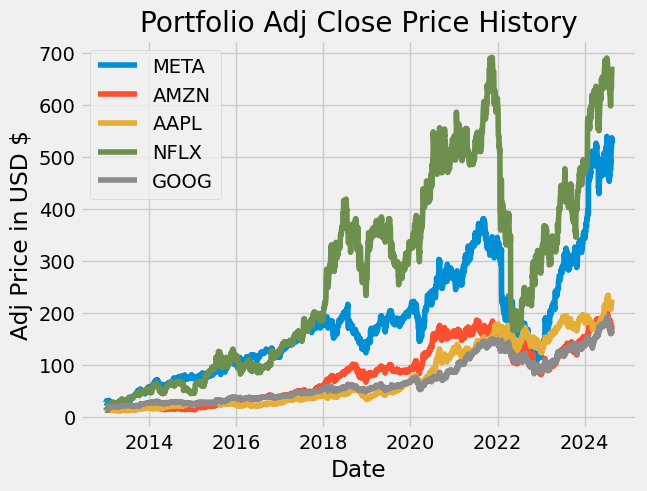

In [25]:
#visulizing the data foe each stock

title='Portfolio Adj Close Price History'

mystocks=df

#Create and plot the graph
for c in mystocks.columns.values:
  plt.plot(mystocks[c], label=c)

plt.title(title)
plt.xlabel('Date')
plt.ylabel('Adj Price in USD $')
plt.legend(mystocks.columns.values, loc='upper left')
plt.show()

In [26]:
# show the daily simple return
returns=df.pct_change()
returns

,META,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027854,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005883,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002692,-0.020565,-0.001973
...,...,...,...,...,...
2024-08-12,-0.003515,-0.000839,0.007130,-0.001262,-0.008707
2024-08-13,0.024402,0.020564,0.017193,0.023502,0.012077
2024-08-14,-0.003368,-0.000764,0.002034,0.021080,-0.023504


In [27]:
#create show the annualize covariance matrix
cov_matrix_annual=returns.cov()*252
cov_matrix_annual

,META,AMZN,AAPL,NFLX,GOOG
META,0.148338,0.068487,0.050481,0.070972,0.061507
AMZN,0.068487,0.105038,0.044991,0.070012,0.055460
AAPL,0.050481,0.044991,0.079537,0.041555,0.043006
NFLX,0.070972,0.070012,0.041555,0.213129,0.052994
GOOG,0.061507,0.055460,0.043006,0.052994,0.075479


In [28]:
#Calculate the portfolio variance
port_variance= np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.06961810667694752

In [29]:
#Calculate the portfolio volatility - Standard Deviation
port_volatile= np.sqrt(port_variance)
port_volatile

0.2638524335247783

In [30]:
#Calculate the annual portfolio return
portfolio_annual_return=np.sum(returns.mean()*weights)*252
portfolio_annual_return

0.30873784170635854

In [33]:
#show the expected annual return, risk(volatility), variance
percent_var=str(round(port_variance,2)*100)+ '%'
percent_volatile=str(round(port_volatile,2)*100)+ '%'
percent_ret=str(round(portfolio_annual_return,1)*100)+ '%'

print('Expected Annual Return: '+percent_ret)
print('Annual Volatile: '+percent_volatile)
print('Annual Variance: '+percent_var)

Expected Annual Return: 30.0%
Annual Volatile: 26.0%
Annual Variance: 7.000000000000001%


In [34]:
!pip install PyPortfolioOpt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 3.9 MB/s eta 0:00:00


In [35]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns


# Portfolio Optmization

In [36]:
#Calculate the expected returns and annualized smaple covariance matrix of asset returns
mu=expected_returns.mean_historical_return(df)
S= risk_models.sample_cov(df)

# optimize for max sharpe ratio

ef=EfficientFrontier(mu, S)
weight=ef.max_sharpe()
clean_weight=ef.clean_weights()
print(clean_weight)
ef.portfolio_performance(verbose=True)

OrderedDict([('META', 0.11919), ('AMZN', 0.0928), ('AAPL', 0.46756), ('NFLX', 0.30759), ('GOOG', 0.01287)])
Expected annual return: 30.2%
Annual volatility: 27.2%
Sharpe Ratio: 1.04


(0.30241360890889996, 0.272089922222871, 1.0379421869126515)

Investors use the Sharpe Ratio to compare the performance of different investments or portfolios, especially when the investments have different levels of risk. It helps in understanding whether the higher returns are due to smart investment choices or simply taking on more risk

In [37]:
#Get the discreet allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices= get_latest_prices(df)
weights=clean_weight
da= DiscreteAllocation(weights, latest_prices, total_portfolio_value=15000)

allocation, leftover=da.lp_portfolio()
print('Discret Allocation: ', allocation)
print('Funds Remaining: ${:.2f}'.format(leftover))


Discret Allocation:  {'META': 3, 'AMZN': 8, 'AAPL': 31, 'NFLX': 7, 'GOOG': 1}
Funds Remaining: $110.48
